In [641]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline


In [642]:
ibm_df = pd.read_csv('IBM_Attrition_Data.csv')

In [643]:
#view first 5 records
ibm_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [644]:
#explain the datas
ibm_df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [645]:
#Check the null values
ibm_df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [646]:
#exploring attrition by age
attrition_grouped = ibm_df[['Age', 'Attrition']].groupby(['Age'])
attrition_grouped.describe()

Attrition                 
        count unique  top freq
Age                           
18          8      2  Yes    4
19          9      2  Yes    6
20         11      2  Yes    6
21         13      2   No    7
22         16      2   No   11
23         14      2   No   10
24         26      2   No   19
25         26      2   No   20
26         39      2   No   27
27         48      2   No   45
28         48      2   No   34
29         68      2   No   50
30         60      2   No   51
31         69      2   No   51
32         61      2   No   50
33         58      2   No   46
34         77      2   No   68
35         78      2   No   68
36         69      2   No   63
37         50      2   No   44
38         58      2   No   56
39         42      2   No   36
40         57      2   No   52
41         40      2   No   34
42         46      2   No   44
43         32      2   No   30
44         33      2   No   27
45         41      2   No   39
46         33      2   No   29
47         24      2   No   21
48         19      2   No   17
49         24      2   No   22
50         30      2   No   25
51         19      2   No   17
52         18      2   No   15
53         19      2   No   17
54         18      1   No   18
55         22      2   No   19
56         14      2   No   11
57          4      1   No    4
58         14      2   No    9
59         10      1   No   10
60          5      1   No    5

## EducationField Analysis

In [647]:
ibm_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [648]:
ibm_df[['EducationField', 'Attrition']].groupby(['EducationField']).describe()

Attrition                
                     count unique top freq
EducationField                            
Human Resources         27      2  No   20
Life Sciences          606      2  No  517
Marketing              159      2  No  124
Medical                464      2  No  401
Other                   82      2  No   71
Technical Degree       132      2  No  100

## Marital Status

In [649]:
marital_status = ibm_df.MaritalStatus
marital_status.unique()


array(['Single', 'Married', 'Divorced'], dtype=object)

In [650]:
unmarried = 0
married = 0
for value in marital_status.values:
    if value == 'Married':
        married += 1
    else:
        unmarried += 1
        
        
print(unmarried)
print(married)

797
673


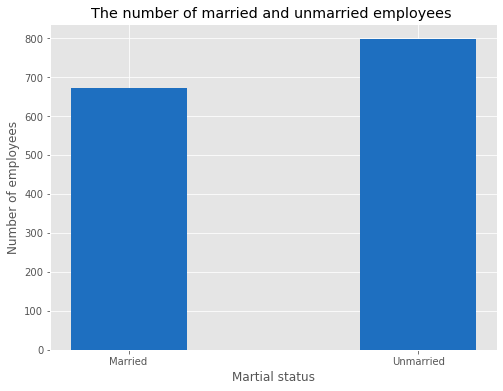

In [651]:
marr_status = ['Married', 'Unmarried']
numbers = [married, unmarried]

style.use('ggplot')
plt.figure(figsize =(8, 6))

plt.bar(marr_status, numbers, color='#1E6FC0', width = 0.4)
plt.title('The number of married and unmarried employees ')
plt.xlabel('Martial status')
plt.ylabel('Number of employees')
plt.show()

In [652]:
#Build a logistic regression model 
#1- Transform Attrition data to numeric (1 or 0)
#2- Split data train and test
#3- Train model
#4- Predict 
#5- Evaluate accuracy

In [653]:
def transform_numeric(value):
    if value == 'Yes':
        value = 1
    else:
        value = 0
    
    return value

y = ibm_df['Attrition'].apply(transform_numeric)

In [654]:
X = ibm_df.drop(['Attrition', 'Department', 'EducationField', 'MaritalStatus'], axis=1)

In [655]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [656]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [657]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [658]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [659]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8673469387755102

## PCA

In [660]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

In [661]:
pca.fit(X_train)

PCA(n_components=0.95)

In [662]:
X_train_transformed = pca.transform(X_train)
X_train_transformed.shape

(1176, 1)

In [663]:
X_test_transformed = pca.transform(X_test)
X_test_transformed.shape

(294, 1)

In [664]:
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [665]:
model.fit(X_train_transformed, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [666]:
y_predict = model.predict(X_test_transformed)
y_predict.shape

(294,)

In [667]:
accuracy_score(y_test, y_predict)

0.8673469387755102